In [1]:
from pipeline import *

import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

current_path = os.getcwd()
seed_val = 2022

In [2]:
my_pipeline = Pipeline()

train_dataset = pd.read_csv(os.path.join(current_path, 'Data', 'train.csv'))
test_dataset = pd.read_csv(os.path.join(current_path, 'Data', 'test.csv'))

		 Description of train data: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


		 Description of test data: 


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


		 NUM UNIQUES in train:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
		 NUM NANs in  train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


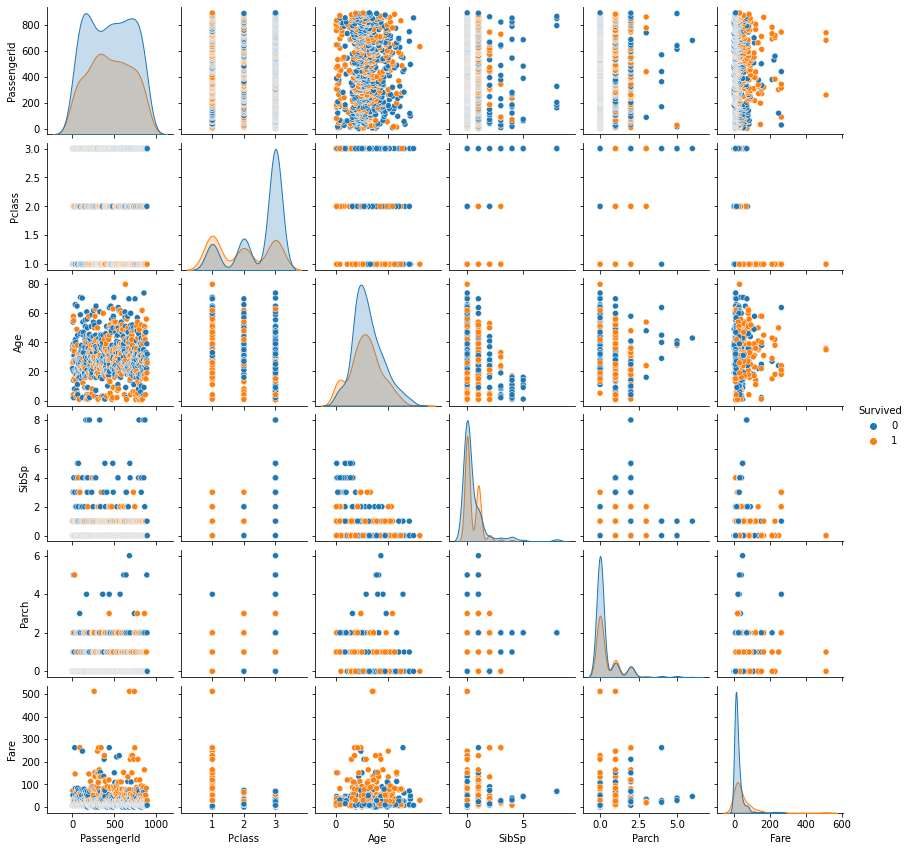

In [3]:
my_pipeline.load_and_view_data({'train': train_dataset, 'test': test_dataset},
                                 'Survived')

In [4]:
my_pipeline.data['train'].Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
scaler_obj = MinMaxScaler(feature_range=(0,1))
my_pipeline.setup_training_data(columns_to_drop=['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin'],
                                columns_to_scale=['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked'], 
                                scaler_obj={"MinMax":scaler_obj},
                                label_name='Survived')

Dropping Columns ...
	 Data shape: (891, 12)
	 Data shape: (891, 7)
Removing Na Rows ...
	 Data shape: (891, 7)
	 Data shape: (889, 7)
Encoding non-numeric data ...
Generating scaler objects ...
	  Scaler objs: dict_keys(['MinMaxScaler()'])
Assigning lables ...
Completed Setup.


In [21]:
KMeans_base_estimator = KMeans(n_clusters=2, 
                               init='k-means++', 
                               n_init=10, max_iter=1000, 
                               tol=0.00001, 
                               verbose=0, 
                               random_state=seed_val, 
                               copy_x=True, 
                               algorithm='auto')
my_pipeline.set_algos({'KMeans_1':KMeans_base_estimator})

Name already referenced. Please try another.


In [7]:
my_pipeline.define_training_cases({1: ['KMeans_1', 'MinMaxScaler()']})

In [39]:
X, Y = my_pipeline.get_data_by_case(1)

Scaling training data ...


## Seems like 'Fare' is being scaled with the Pclass scaler
- could be saving it incorrectly
- could be loading & applying it incorrectly

In [33]:
X.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0.0,0,0.0,0.0,3.62500,0.0
1,1,0.5,1,0.0,0.0,35.64165,0.5
2,1,0.0,1,0.5,0.0,3.96250,0.0
3,1,0.5,1,0.0,0.0,26.55000,0.0
4,0,0.0,0,0.5,0.0,4.02500,0.0


In [31]:
my_pipeline.data['train']['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [35]:
sc1 = MinMaxScaler(feature_range=(0,1))
sc2 = MinMaxScaler(feature_range=(0,1))
sc3 = MinMaxScaler(feature_range=(0,1))
sc1.fit(np.array(my_pipeline.data['train']['Fare']).reshape(-1,1))
sc2.fit(np.array(my_pipeline.data['train']['Pclass']).reshape(-1,1))
sc3.fit(np.array(my_pipeline.data['train']['SibSp']).reshape(-1,1))

MinMaxScaler()

In [37]:
sc1.transform(np.array(my_pipeline.data['train']['Fare']).reshape(-1,1))[0:10]

array([[0.01415106],
       [0.13913574],
       [0.01546857],
       [0.1036443 ],
       [0.01571255],
       [0.0165095 ],
       [0.10122886],
       [0.04113566],
       [0.02173075],
       [0.05869429]])

In [41]:
sc2.transform(np.array(my_pipeline.data['train']['Fare']).reshape(-1,1))[0:10]

array([[ 3.625  ],
       [35.64165],
       [ 3.9625 ],
       [26.55   ],
       [ 4.025  ],
       [ 4.22915],
       [25.93125],
       [10.5375 ],
       [ 5.56665],
       [15.0354 ]])

In [30]:
scaler = my_pipeline.scalers['MinMaxScaler()']['Fare']
scaler.transform[my_pipeline.data['train']['Fare'].copy()].head()

TypeError: 'method' object is not subscriptable

In [29]:
my_pipeline.data['train']['']

AttributeError: 'dict' object has no attribute 'columns'

In [20]:
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0.0,0,0.0,0.0,3.62500,0.0
1,1,0.5,1,0.0,0.0,35.64165,0.5
2,1,0.0,1,0.5,0.0,3.96250,0.0
3,1,0.5,1,0.0,0.0,26.55000,0.0
4,0,0.0,0,0.5,0.0,4.02500,0.0
...,...,...,...,...,...,...,...
886,0,1.0,0,0.5,0.0,6.50000,0.0
887,1,0.5,1,0.5,0.0,15.00000,0.0
888,0,0.0,1,0.0,1.0,11.72500,0.0
889,1,0.5,0,0.5,0.0,15.00000,0.5


In [13]:
pca = PCA(2)
X_pca = pca.fit_transform(X.copy())

In [14]:
KMeans_base_estimator = KMeans(n_clusters=2, 
                               init='k-means++', 
                               n_init=10, max_iter=1000, 
                               tol=0.00001, 
                               verbose=0, 
                               random_state=seed_val, 
                               copy_x=True, 
                               algorithm='auto')
my_pipeline.add_algorithm(KMeans_base_estimator, 'KMeans_1')

In [15]:
my_pipeline.algorithms['KMeans_1']

KMeans(max_iter=1000, n_clusters=2, random_state=2022, tol=1e-05)

In [16]:
my_pipeline.algorithms['KMeans_1'].fit(X_pca)
predictions = my_pipeline.algorithms['KMeans_1'].predict(X_pca)

In [17]:
my_pipeline.add_predictions('KMeans_1', predictions)

In [19]:
my_pipeline.get_errors(predictions, 'KMeans_1')

(-0.10674157303370786,
 array([-9.50000000e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.00000000e-01, -3.33333333e-01, -2.85714286e-01,
        -1.25000000e-01, -1.11111111e-01, -1.00000000e-01, -1.81818182e-01,
        -1.66666667e-01, -2.30769231e-01, -2.85714286e-01, -2.66666667e-01,
        -2.50000000e-01, -2.35294118e-01, -2.77777778e-01, -2.10526316e-01,
        -2.50000000e-01, -2.38095238e-01, -2.27272727e-01, -2.17391304e-01,
        -2.50000000e-01, -2.40000000e-01, -2.69230769e-01, -2.59259259e-01,
        -2.85714286e-01, -2.41379310e-01, -2.33333333e-01, -2.25806452e-01,
        -2.18750000e-01, -1.81818182e-01, -1.76470588e-01, -1.71428571e-01,
        -1.66666667e-01, -1.35135135e-01, -1.31578947e-01, -1.28205128e-01,
        -1.25000000e-01, -1.21951220e-01, -1.19047619e-01, -1.16279070e-01,
        -1.13636364e-01, -8.88888889e-02, -8.69565217e-02, -8.51063830e-02,
        -8.33333333e-02, -6.12244898e-02, -6.00000000e-02, -3.921